Matplotlib Version: 3.8.1
Matplotlib Installation Directory: c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\matplotlib\__init__.py
Matplotlib Configuration Directory: C:\Users\ewqds\.matplotlib
Matplotlib Cache Directory: C:\Users\ewqds\.matplotlib
Data types of each column:
Unnamed: 0     int64
연령            object
성별            object
상황키워드         object
신체질환          object
감정_대분류        object
감정_소분류        object
사람문장1         object
시스템문장1        object
사람문장2         object
시스템문장2        object
사람문장3         object
시스템문장3        object
dtype: object

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51630 non-null  int64 
 1   연령          51630 non-null  object
 2   성별          51630 non-null  object
 3   상황키워드       51630 non-null  object
 4   신체질환        51630 non-null  object
 5   감정_대분류      

c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ewqds\anaconda3\envs\gdsc_proj\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from curren

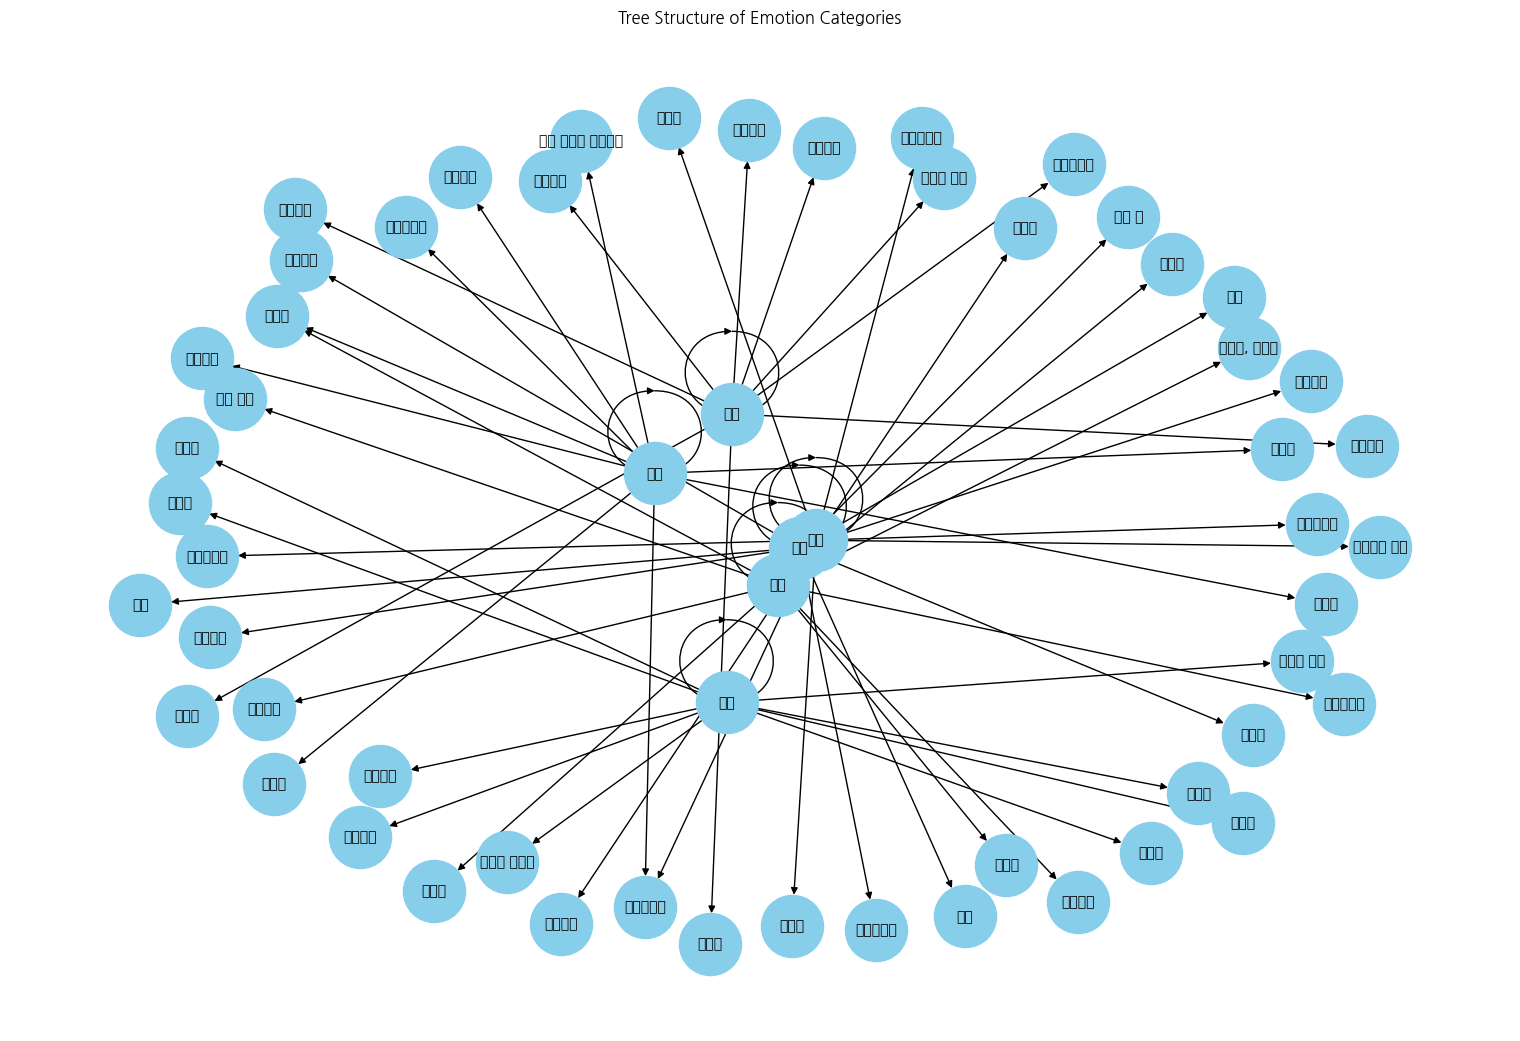

In [5]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

# Update matplotlib's settings to use a font that supports Korean
mpl.rcParams['font.family'] = 'NanumGothic'

print("Matplotlib Version:", mpl.__version__)
print("Matplotlib Installation Directory:", mpl.__file__)
print("Matplotlib Configuration Directory:", mpl.get_configdir())
print("Matplotlib Cache Directory:", mpl.get_cachedir())

# Load the dataset
file_path = 'C:\\Users\\ewqds\\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training.csv'
data = pd.read_csv(file_path, encoding='utf-8')
# Using dtypes to get the data type of each column
print("Data types of each column:")
print(data.dtypes)

# Using info() to get a summary including data types
print("\nDataFrame Summary:")
data.info()

# Extracting the relevant columns
emotion_major = data['감정_대분류']
emotion_subcategory = data['감정_소분류']

# Creating a dictionary to map major emotion categories to their subcategories
emotion_tree = defaultdict(set)
for major, sub in zip(emotion_major, emotion_subcategory):
    emotion_tree[major].add(sub)

# Creating a network graph from the tree structure
G = nx.DiGraph()
for major in emotion_tree:
    G.add_node(major)
    for sub in emotion_tree[major]:
        G.add_node(sub)
        G.add_edge(major, sub)

# Plotting the tree
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
plt.title("Tree Structure of Emotion Categories")
plt.show()

### 문제 현상
- 한글이 깨지는 현상 발생
- 감성 분석에 관한 프롬프트를 영어로 구성해야 함.
- 기존 데이터에 나와 있는 '감정_대분류'와 '감정 소분류' 특성을 영어로 번역할 필요
### 해결 방안
- '감정_대분류'와 '감정 소분류'에 대한 고유 벡터를 구함.
- 고유 벡터의 각 요소들을 번역하여 list를 재구성
- dictionary로 {(원래 값):(번역 값), ..} 형식으로 구성하여 '감정_대분류'와 '감정 소분류'를 영어로 변환함

In [6]:
# '감정_대분류'에 대한 고유값 확인

### '감정_대분류'에 대한 고유값 확인

In [10]:
data['감정_대분류'].value_counts()
Bigunique_vect = data['감정_대분류'].unique()
print(data['감정_대분류'].unique())
BiguniqueEngVect = ['Anger', 'Joy', 'Anxiety', 'Embarrassment', 'Sadness', 'Hurt']
Bigdict = dict(zip(Bigunique_vect, BiguniqueEngVect))
print(Bigdict)

['분노' '기쁨' '불안' '당황' '슬픔' '상처']


### '감정_소분류'에 대한 고유값 확인

In [13]:
data['감정_소분류'].value_counts()
Smallunique_vect = data['감정_소분류'].unique()


{'노여워하는': 'angry', '느긋': 'relaxed', '걱정스러운': 'worried', '당혹스러운': 'embarrassed', '당황': 'embarrassed', '마비된': 'paralyzed', '만족스러운': 'satisfied', '배신당한': 'betrayed', '버려진': 'abandoned', '부끄러운': 'ashamed', '분노': 'angry', '불안': 'anxious', '비통한': 'grieving', '상처': 'hurt', '성가신': 'annoyed', '스트레스 받는': 'stressed', '슬픔': 'sad', '신뢰하는': 'trusting', '신이 난': 'excited', '실망한': 'disappointed', '악의적인': 'malicious', '안달하는': 'fretful', '안도': 'Relieved', '억울한': 'Unjust', '열등감': 'Inferiority', '염세적인': 'Pessimistic', '외로운': 'Lonely', '우울한': 'Depressed', '고립된': 'Isolated', '좌절한': 'Frustrated', '후회되는': 'Regret', '혐오스러운': 'Disgusting', '한심한': 'Pathetic', '자신하는': 'Confident', '기쁨': 'happy', '툴툴대는': 'grunting', '남의 시선을 의식하는': 'self-conscious', '회의적인': 'skeptical', '죄책감의': 'guilty', '혼란스러운': 'confused', '초조한': 'nervous', '흥분': 'excited', '충격 받은': 'shocked', '취약한': 'vulnerable', '편안한': 'comfortable', '방어적인': 'defensive', '질투하는': 'jealous', '두려운': 'fearful', '눈물이 나는': 'tearful', '짜증내는': 'irritable', '조심스러운': 'cau

### 고유 벡터의 값들을 영어로 번역함.
### 

In [ ]:
SmalluniqueEngVect = [
'angry', 'relaxed', 'worried', 'embarrassed', 'embarrassed', 'paralyzed', 'satisfied', 
'betrayed', 'abandoned', 'ashamed', 'angry', 'anxious', 'grieving', 'hurt', 'annoyed', 
'stressed', 'sad', 'trusting', 'excited', 'disappointed', 'malicious', 'fretful', 'Relieved', 
'Unjust', 'Inferiority', 'Pessimistic', 'Lonely', 'Depressed', 'Isolated', 'Frustrated', 'Regret', 
'Disgusting', 'Pathetic', 'Confident', 'happy', 'grunting', 'self-conscious', 'skeptical', 'guilty', 
'confused', 'nervous', 'excited', 'shocked', 'vulnerable', 'comfortable', 'defensive', 'jealous', 
'fearful', 'tearful', 'irritable', 'cautious', 'despondent', 'disillusioned', 'Sacrificed', 'Grateful', 
'Disgusted', 'Distressed', 'Poor, Disadvantaged']
Smalldict = dict(zip(Smallunique_vect, SmalluniqueEngVect))
print(Smalldict)

### '감정_대분류'와 '감정_소분류'에 대해서 영어로 변환하는 함수 작성

In [ ]:

def conv_eng(emotion):
    return SmalluniqueEngVect[emotion]